In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots

df = sns.load_dataset('titanic')


## Vorlesungsbegleitendes Skript zu Vorlesungseinheit 6


* Jede Zeile entspricht einem Passagier
* Wir bekommen einen ersten Überblick über die Datenstruktur
* Die Spalte Cabin enthält fehlende Werte NaN (Not a Number)

### Output Variable
Survived: 0 = Dead, 1 = Survived --> Output Variable

### Input Variablen (mögliche)
Pclass: Ticket class with 1 = 1st class, 2 = 2nd class, 3 = 3rd class

Sex: Gender of male or female

Age: Age in years

SibSp: Number of siblings/spouses aboard the Titanic

Parch: Number of parents/children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare (Preis)

Cabin: Cabin number

Embarked: Port of Embarkation with C = Cherbourg, Q = Queenstown, S = Southampton

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
# Anzahl von Zeilen und Spalten
df.shape

(891, 15)

In [40]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: >

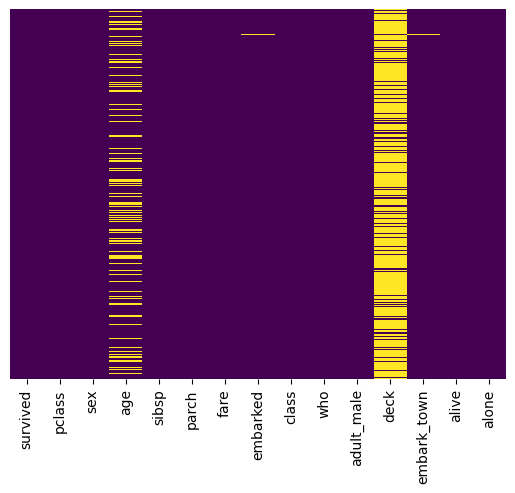

In [53]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [76]:
# redunate Information in alive und adult_male und embark_town
print(pd.crosstab(df['sex'], df['adult_male']))
print(pd.crosstab(df['alive'], df['survived']))
print(pd.crosstab(df['adult_male'], df['who']))
print(pd.crosstab(df['embarked'], df['embark_town']))

adult_male  False  True 
sex                     
female        314      0
male           40    537
survived    0    1
alive             
no        549    0
yes         0  342
who         child  man  woman
adult_male                   
False          83    0    271
True            0  537      0
embark_town  Cherbourg  Queenstown  Southampton
embarked                                       
C                  168           0            0
Q                    0          77            0
S                    0           0          644


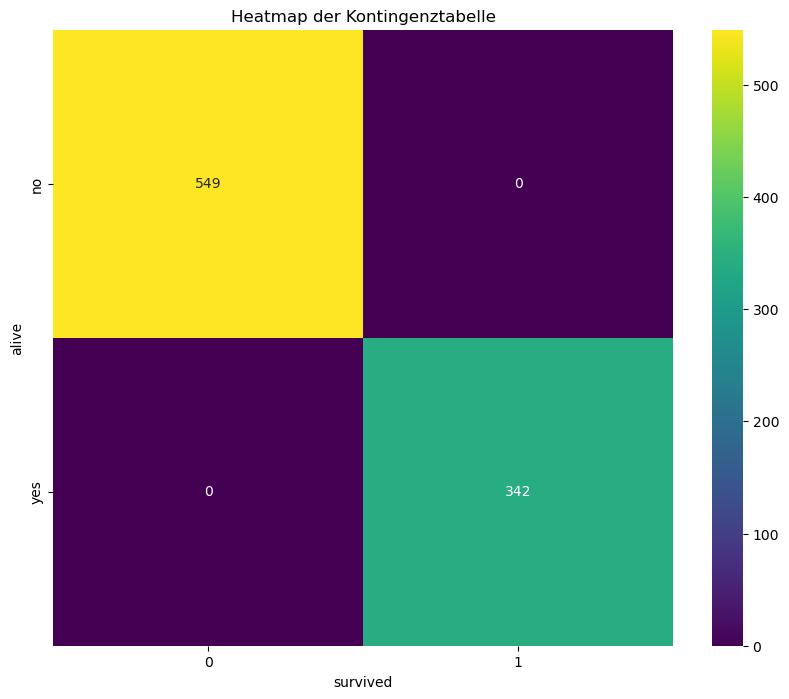

In [80]:
plt.figure(figsize=(10, 8))  # Festlegen der Größe des Plots
sns.heatmap(pd.crosstab(df['alive'], df['survived']), annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap der Kontingenztabelle')
plt.xlabel('survived')
plt.ylabel('alive')
plt.show()

In [62]:
df_clean = df.drop(['age', 'deck', 'alive', 'adult_male', 'embark_town'], axis=1)

<Axes: >

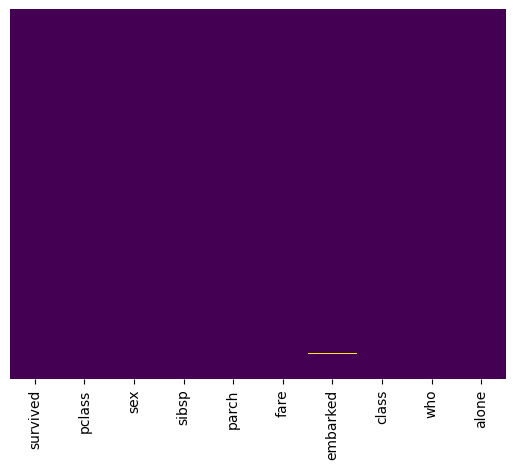

In [63]:
sns.heatmap(df_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [64]:
# Ermitteln der kategorischen Variablen und deren Kardinalität im Seaborn Datensatz
titanic_cat = df_clean.select_dtypes(include=['object', 'category']).columns
cardinality = {col: df_clean[col].unique() for col in titanic_cat}
cardinality

{'sex': array(['male', 'female'], dtype=object),
 'embarked': array(['S', 'C', 'Q', nan], dtype=object),
 'class': ['Third', 'First', 'Second']
 Categories (3, object): ['First', 'Second', 'Third'],
 'who': array(['man', 'woman', 'child'], dtype=object)}

In [65]:
df_clean.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,alone
0,0,3,male,1,0,7.2500,S,Third,man,False
1,1,1,female,1,0,71.2833,C,First,woman,False
2,1,3,female,0,0,7.9250,S,Third,woman,True
3,1,1,female,1,0,53.1000,S,First,woman,False
4,0,3,male,0,0,8.0500,S,Third,man,True


/Users/schoch/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/Users/schoch/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


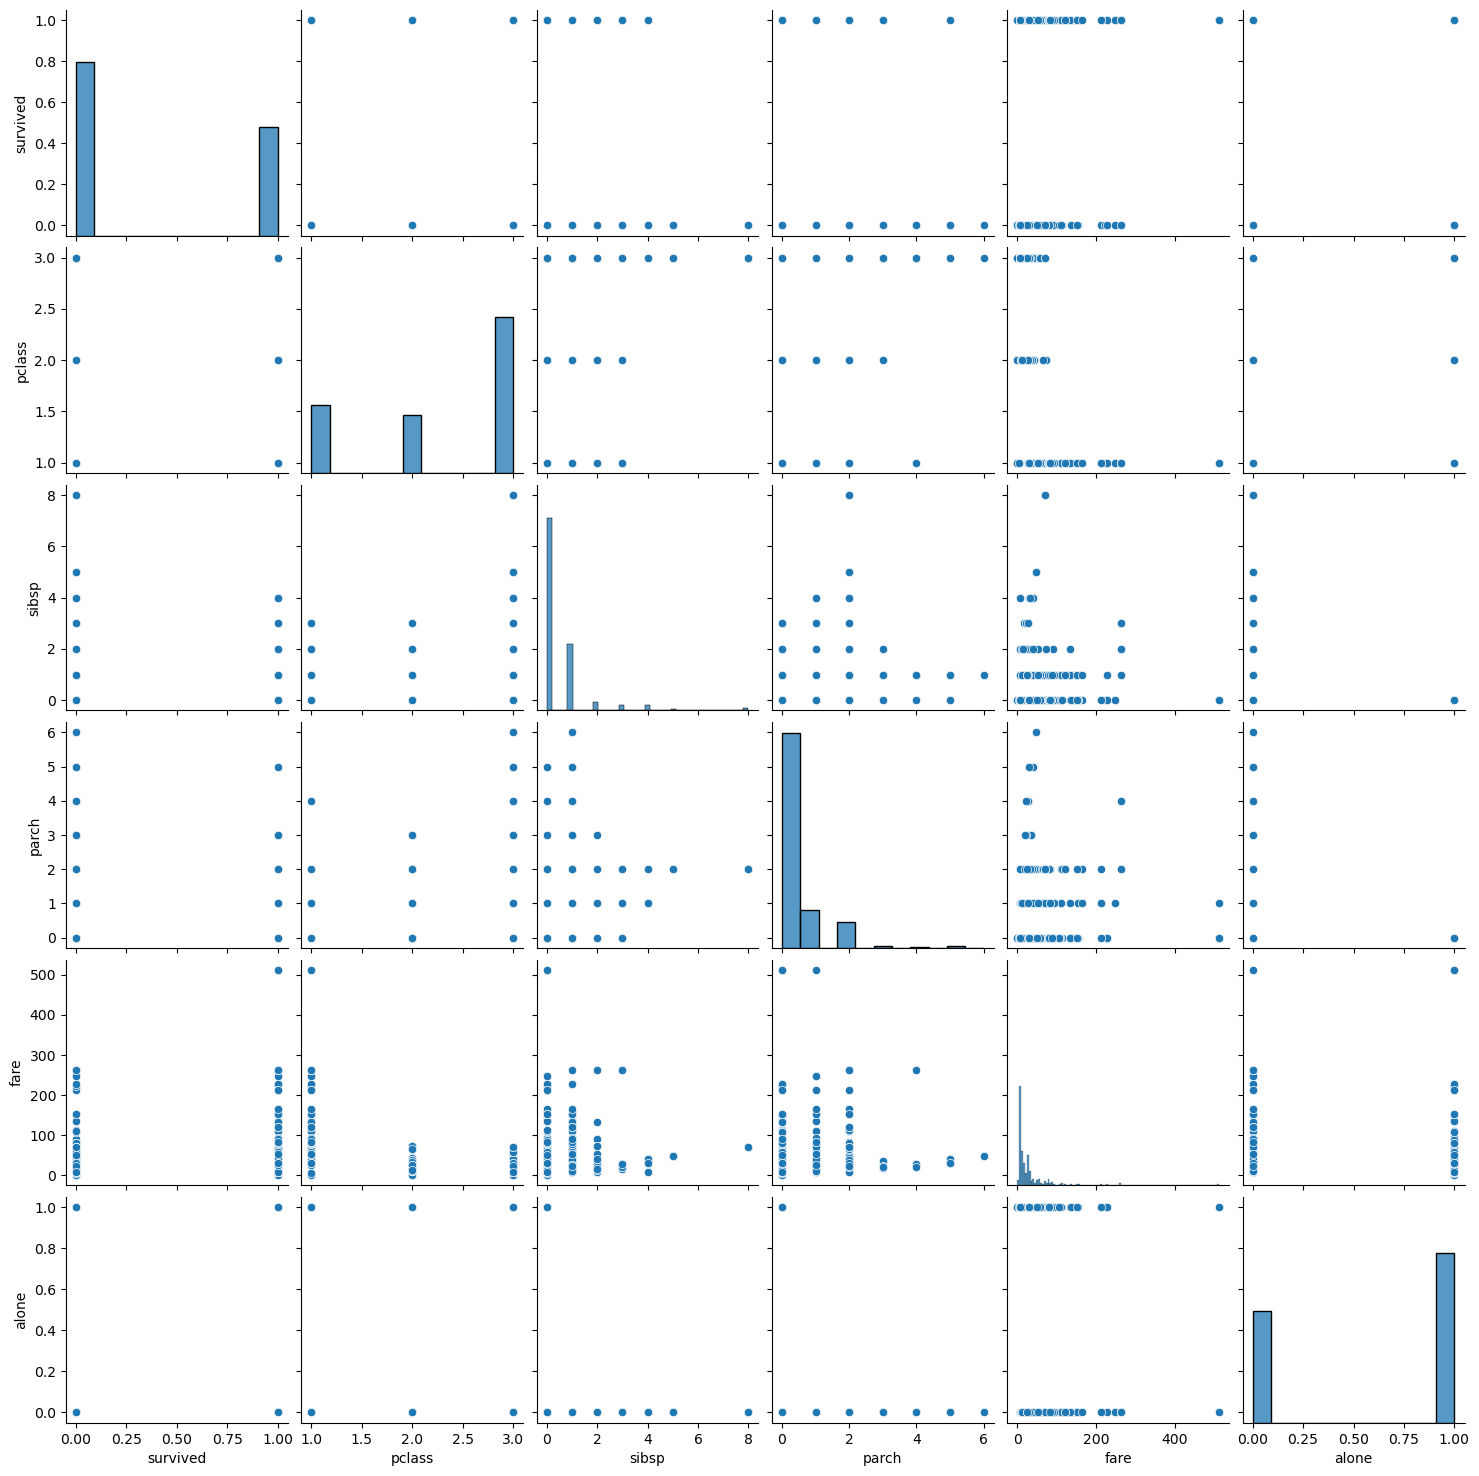

In [82]:
sns.pairplot(df_clean)

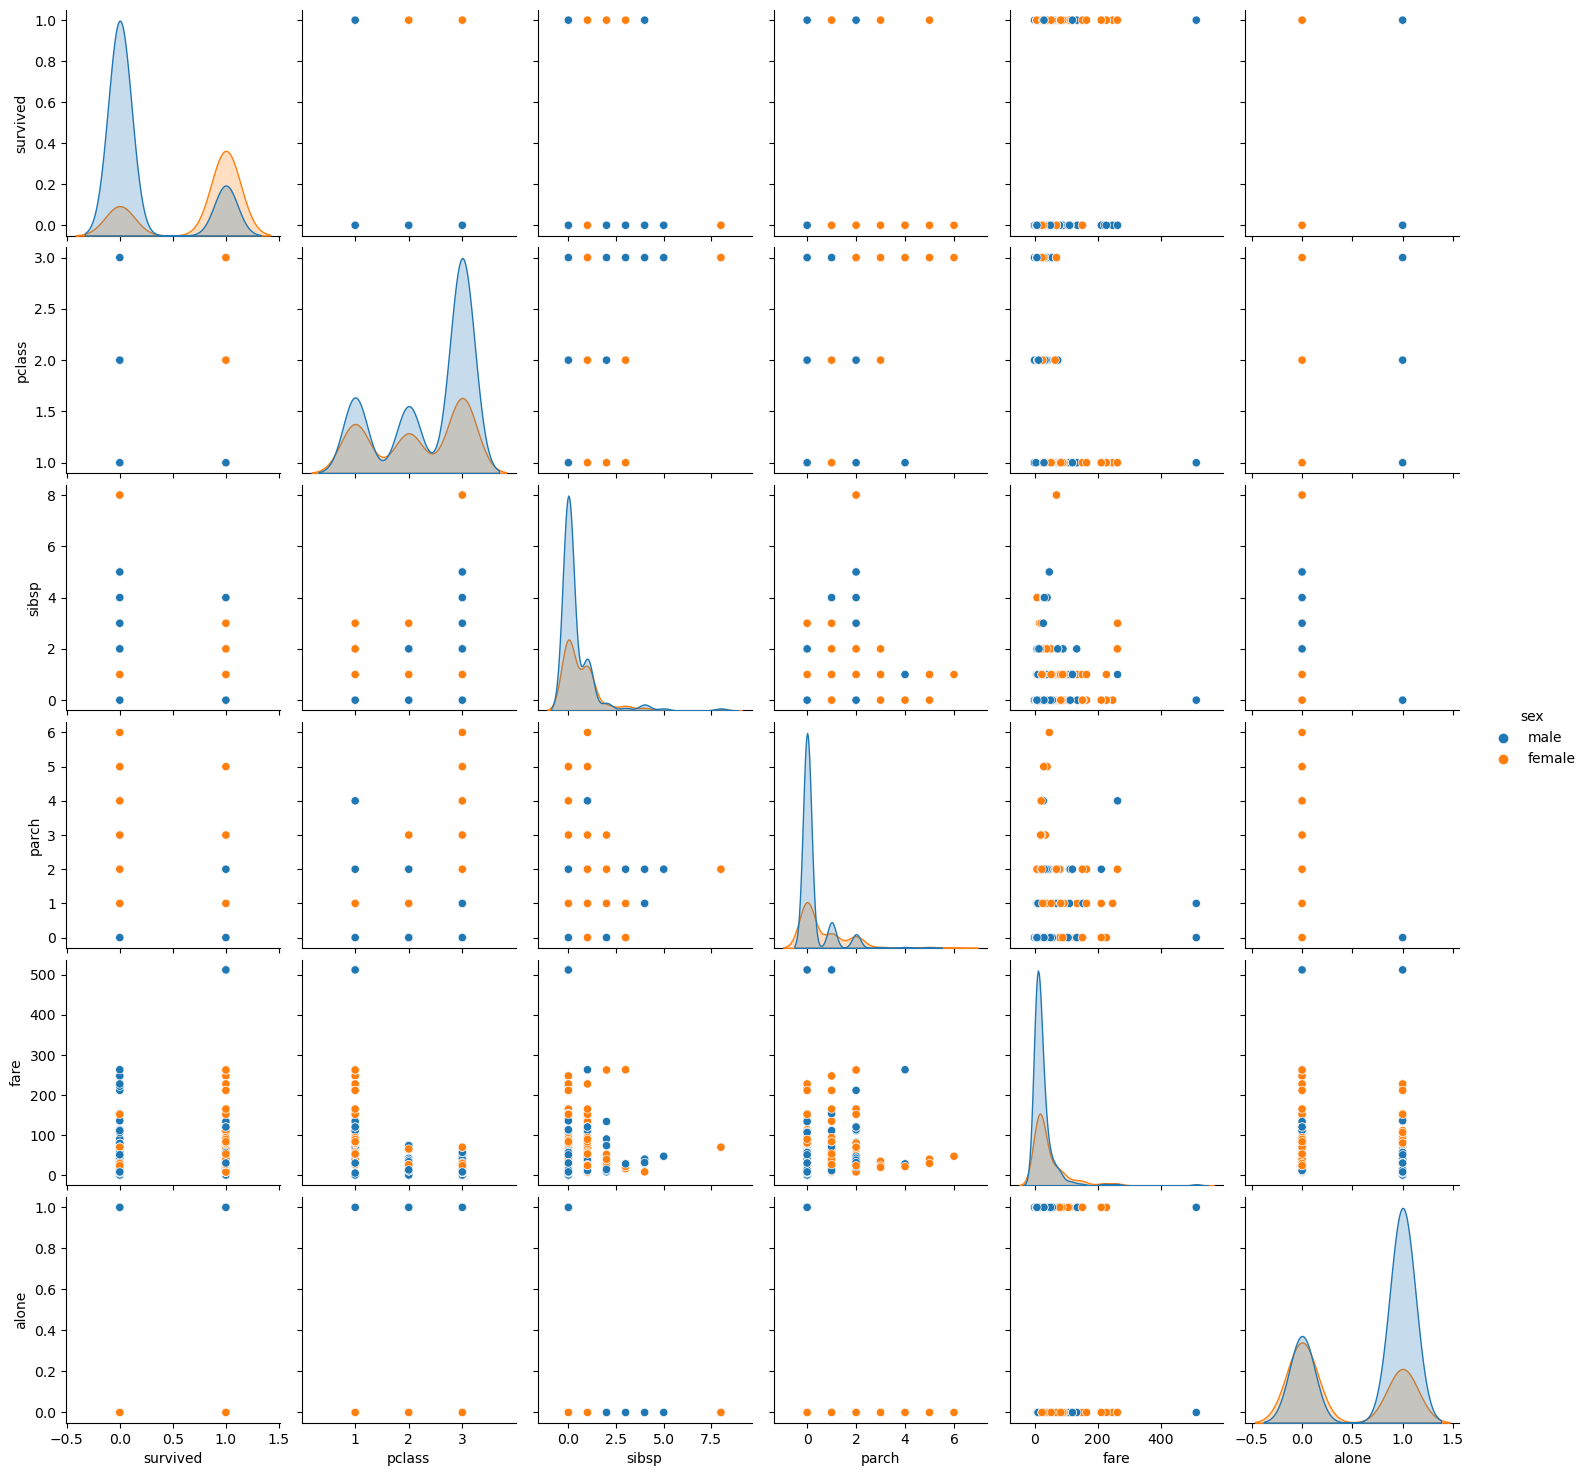

In [83]:
sns.pairplot(df_clean, hue = 'sex')

/Users/schoch/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/Users/schoch/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


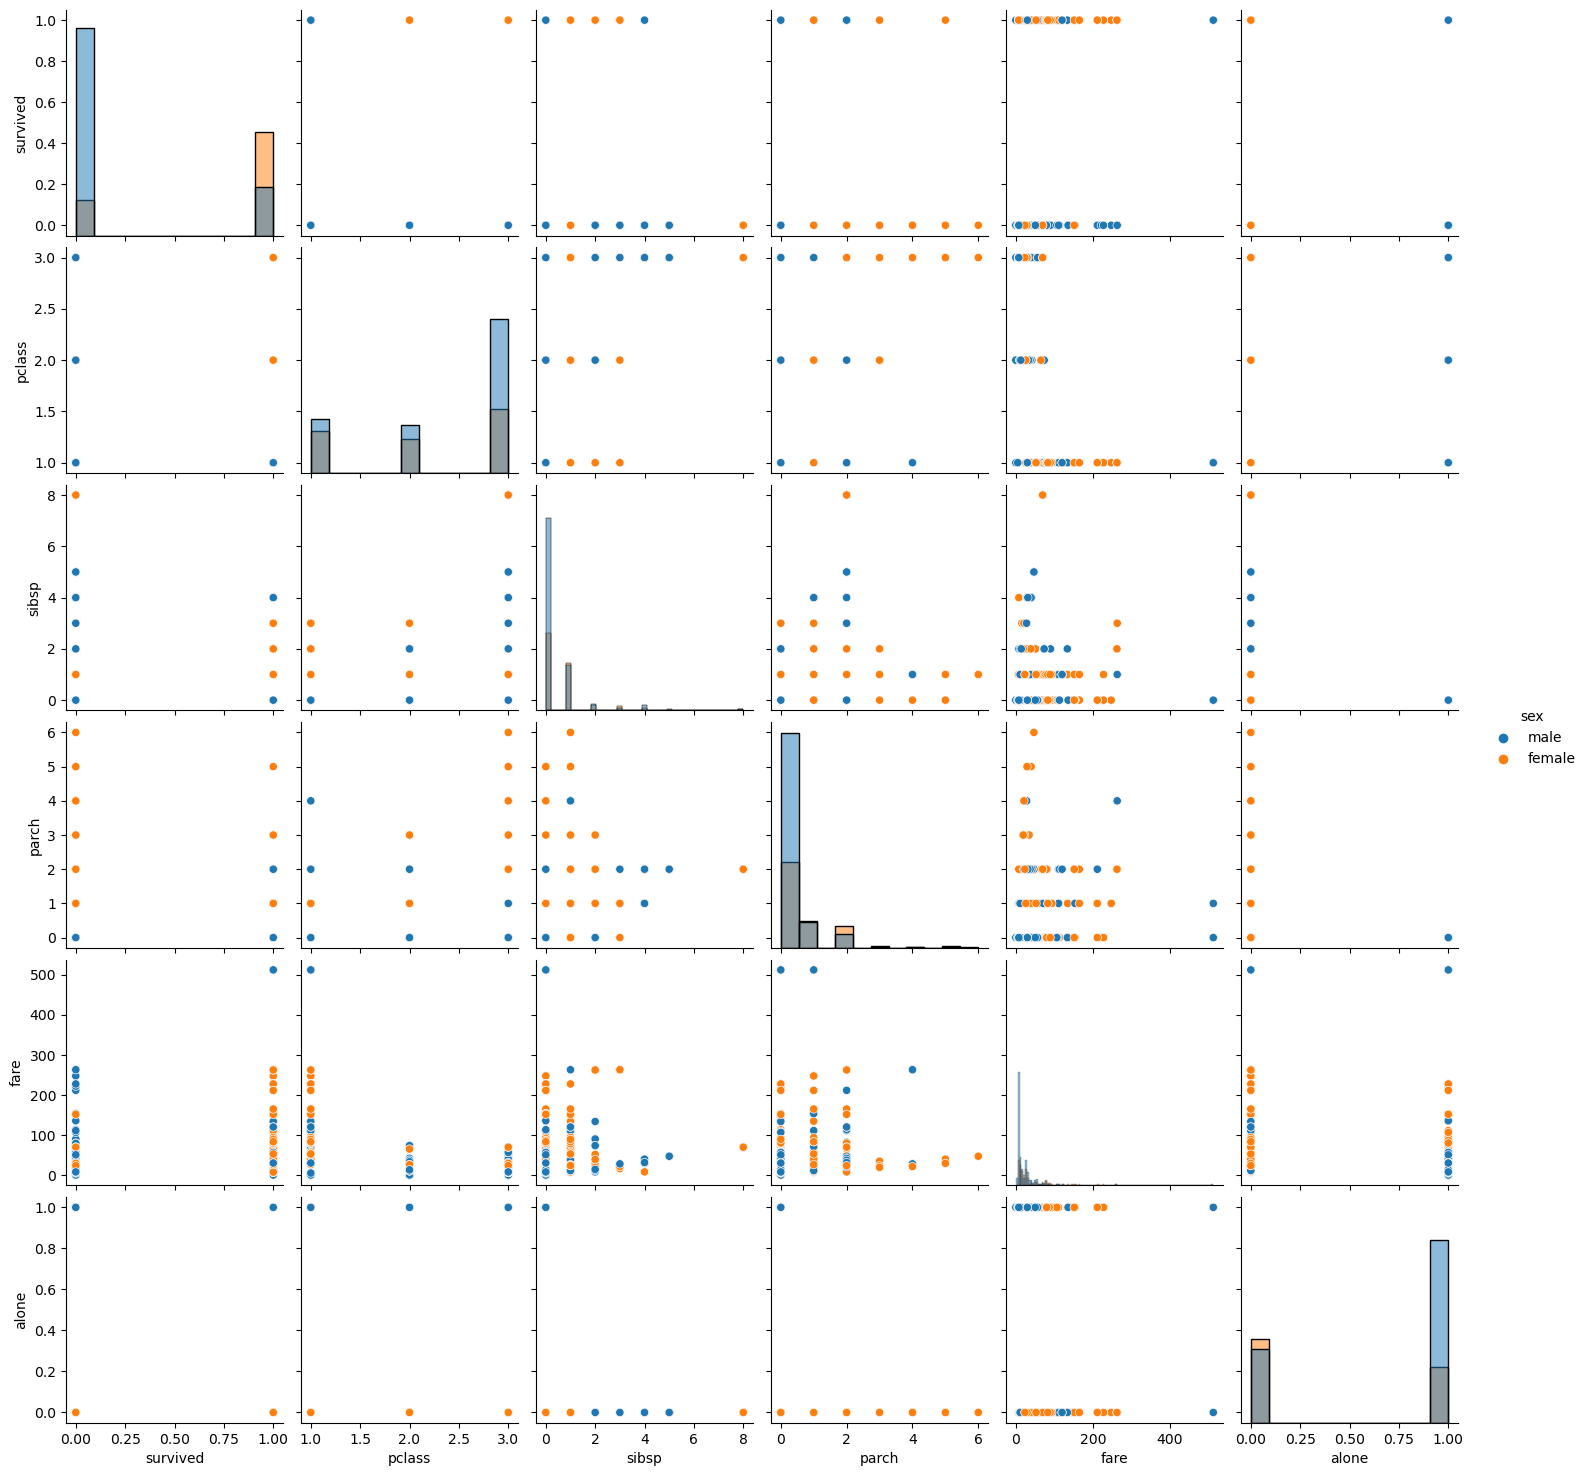

In [70]:
sns.pairplot(df_clean, hue="sex", diag_kind='hist')

In [85]:
# Erzeugen von Dummy Variablen je kategorischer Variablen
titanic_cat = df_clean.select_dtypes(include=['object', 'category']).columns

dummies = pd.get_dummies(df_clean[titanic_cat], drop_first=True)
dummies.head()

,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman
0,True,False,True,False,True,True,False
1,False,False,False,False,False,False,True
2,False,False,True,False,True,False,True
3,False,False,True,False,False,False,True
4,True,False,True,False,True,True,False
